In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ali
[nltk_data]     Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [4]:
news_data = pd.read_csv('D:\\test\\news.csv')
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
news_data.shape

(6335, 4)

In [6]:
# counting the number of missing values in the dataset
news_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
# Add the new column which gives a unique number to each of these labels 
news_data['label'] = news_data['label'].map({'FAKE' : 0, 'REAL': 1})

In [8]:
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [9]:
# separating the data & label

## Get the Independent Features
X = news_data.drop(columns='label', axis=1)
## Get the Dependent features
Y = news_data['label']

In [10]:
port_stem = PorterStemmer()

In [11]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [12]:
news_data['title'] = news_data['title'].apply(stemming)

In [13]:
print(news_data['title'])

0                                      smell hillari fear
1       watch exact moment paul ryan commit polit suic...
2                           kerri go pari gestur sympathi
3          berni support twitter erupt anger dnc tri warn
4                           battl new york primari matter
                              ...                        
6330       state depart say find email clinton specialist
6331                        p pb stand plutocrat pentagon
6332             anti trump protest tool oligarchi inform
6333    ethiopia obama seek progress peac secur east a...
6334                jeb bush suddenli attack trump matter
Name: title, Length: 6335, dtype: object


In [14]:
#separating the data and label
X = news_data['title'].values
Y = news_data['label'].values

In [15]:
print(X)

['smell hillari fear'
 'watch exact moment paul ryan commit polit suicid trump ralli video'
 'kerri go pari gestur sympathi' ...
 'anti trump protest tool oligarchi inform'
 'ethiopia obama seek progress peac secur east africa'
 'jeb bush suddenli attack trump matter']


In [16]:
print(Y)

[0 0 1 ... 0 1 1]


In [17]:
# converting the textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(news_data['title'])

In [18]:
print(X)

  (0, 1564)	0.5606827254461214
  (0, 2085)	0.31703295849951846
  (0, 4121)	0.7649346276717717
  (1, 4632)	0.3570873926755785
  (1, 3110)	0.3052512255137511
  (1, 4790)	0.21438836844525752
  (1, 3468)	0.289792532169645
  (1, 4590)	0.13375985783385952
  (1, 4293)	0.34538066759036196
  (1, 3235)	0.24068640857257223
  (1, 789)	0.3489780894571245
  (1, 3808)	0.28763471111421596
  (1, 3105)	0.26390463433174904
  (1, 2782)	0.32343996242261175
  (1, 4871)	0.274736687450942
  (2, 4338)	0.6325404610612487
  (2, 3076)	0.44509262470769245
  (2, 1882)	0.39730333752620406
  (2, 2468)	0.493897943447611
  (3, 292)	0.4156726506521905
  (3, 4859)	0.28825672919854245
  (3, 4575)	0.286381948064206
  (3, 1204)	0.319007999560105
  (3, 145)	0.3812400071939003
  (3, 1421)	0.4045878153417273
  :	:
  (6332, 3401)	0.4257538919255427
  (6332, 3009)	0.3916583644201471
  (6332, 4630)	0.35756283691475155
  (6332, 3396)	0.2654899202282093
  (6332, 4530)	0.41160296945311037
  (6332, 2250)	0.3078027460192596
  (6332, 1

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train, Y_train)

LogisticRegression()

In [22]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9070639305445936


In [24]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [25]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8318863456985004


In [26]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [28]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.807
Confusion matrix, without normalization


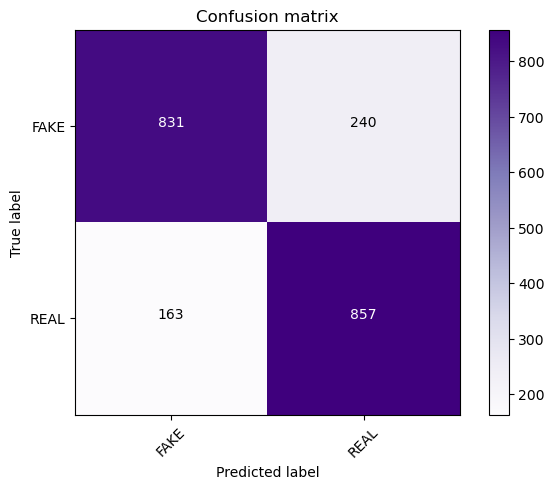

In [29]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X1_train, Y1_train)
prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y1_test, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [30]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.755
Confusion matrix, without normalization


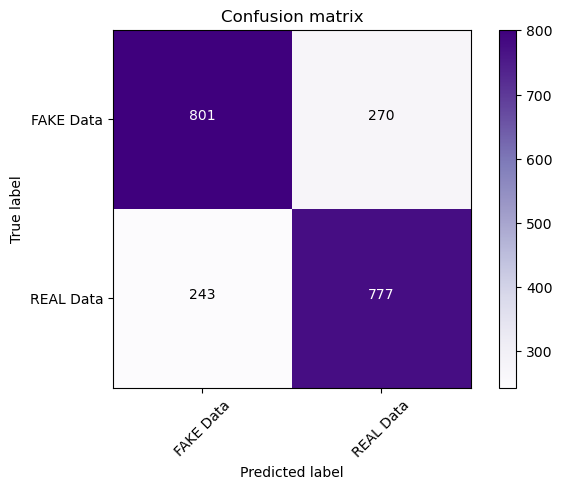

In [31]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

In [32]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.764
Confusion matrix, without normalization


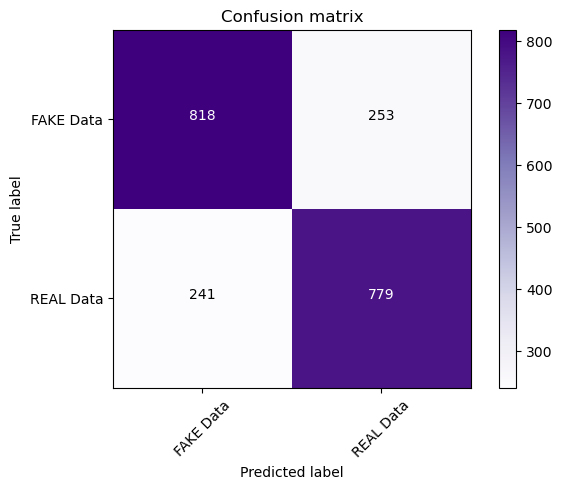

In [33]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

In [34]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [35]:
print(Y_test[0])

1


In [36]:
X1_new = X1_test[0]

prediction = model.predict(X1_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [37]:
print(Y1_test[0])

0


In [38]:
X2_new = X2_test[0]

prediction = model.predict(X2_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [39]:
print(Y2_test[0])

0


In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       633
           1       0.85      0.81      0.83       634

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



In [41]:
import pickle

# Train karne ke baad model and vectorizer ko save karo
pickle.dump(model, open("model.pkl", "wb"))           # ML model
pickle.dump(vectorizer, open("vectorizer.pkl", "wb")) # TF-IDF vectorizer